First, the necessary librearies must be entered. the librearies used are:

**Pandas**: A powerful library for data manipulation and analysis, offering intuitive data structures and functions.

**NumPy**: Essential for numerical computing, NumPy provides support for arrays and matrices, along with a vast array of mathematical functions.

**Seaborn**: Built on top of Matplotlib, Seaborn offers a high-level interface for creating attractive statistical graphics, enhancing data visualization effortlessly.

**SciPy.Optimize**: SciPy's optimization module provides a collection of algorithms for optimizing functions, including nonlinear optimization, root finding, and linear programming.

**StatsModel.API**: A comprehensive library for statistical modeling, StatsModel.API offers tools for estimating statistical models, performing hypothesis tests, and exploring data relationships.

**Scikit-learn (sklearn)**: A leading machine learning library in Python, scikit-learn provides efficient tools for data mining and data analysis, with a wide range of supervised and unsupervised learning algorithms.

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
/content/heart.csv

NameError: name 'content' is not defined

DATASET
LINK: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
the following are included in the data

This dataset, originating from 1988, comprises four distinct databases: Cleveland, Hungary, Switzerland, and Long Beach V. It encompasses a total of 76 attributes, with one of them being the predicted attribute. However, all documented experiments involve utilizing a subset of 14 attributes. The "target" field indicates the presence of heart disease in the patient, with a value of 0 representing no disease and 1 indicating the presence of disease.
1. age

2. sex

3. chest pain type (4 values) (cp)

4. resting blood pressure (trestbps)

5. serum cholestoral in mg/dl(chol)

6. fasting blood sugar > 120 mg/dl(fbs)

7. resting electrocardiographic results (values 0,1,2) (restecg)

8. maximum heart rate achieved(thalach)

9. exercise induced angina(exang)

10. oldpeak = ST depression induced by exercise relative to rest

11. the slope of the peak exercise ST segment (slope)

12. number of major vessels (0-3) colored by flourosopy(ca)

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect(thal)

In [ ]:
import pandas as pd
cvd_df = pd.read_csv("heart.csv")
cvd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
cvd_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
a_columns = ['sex','restecg','cp',
               'exang','thal','ca','target']

b_col=['age','trestbps','chol','thalach','oldpeak','fbs', 'slope']
for i in a_columns:
    print(i)
    print("    ")
    print(cvd_df[i].value_counts())
    print("    ")

sex
    
sex
1    713
0    312
Name: count, dtype: int64
    
restecg
    
restecg
1    513
0    497
2     15
Name: count, dtype: int64
    
cp
    
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
    
exang
    
exang
0    680
1    345
Name: count, dtype: int64
    
thal
    
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64
    
ca
    
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
    
target
    
target
1    526
0    499
Name: count, dtype: int64
    


In [ ]:
cvd_df.dropna(axis = 0, inplace = True)
print(cvd_df.head(), cvd_df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0   (1025, 14)


In [ ]:
print(cvd_df.thal.value_counts())

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


EXPLORATORY DATA ANALYSIS:

Exploratory Data Analysis (EDA) is a crucial initial step in data analysis where analysts explore and summarize key characteristics of a dataset. Through techniques like summary statistics, data visualization, and dimensionality reduction, EDA helps in understanding the underlying patterns, relationships, and potential problems within the data, paving the way for more advanced analysis and modeling.

<Axes: xlabel='thal', ylabel='count'>

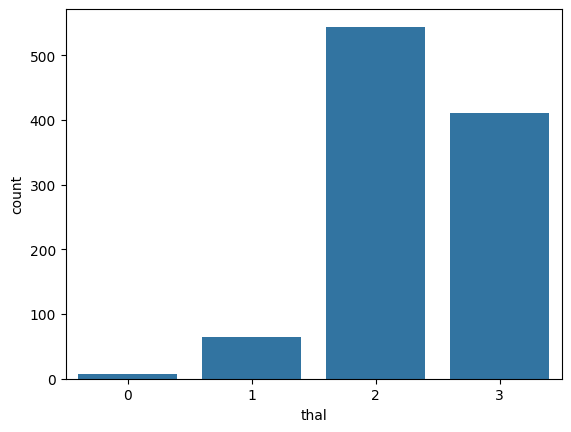

In [ ]:
import seaborn as sns
sns.countplot(x=cvd_df["thal"])

we can see that there are some missing or unknown values (1=normal, 2=reversible defect; 3=irreversible defect)

<Axes: xlabel='target', ylabel='count'>

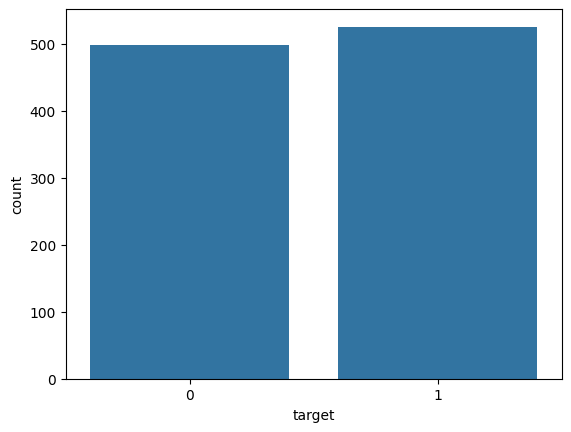

In [ ]:
sns.countplot(x=cvd_df["target"])

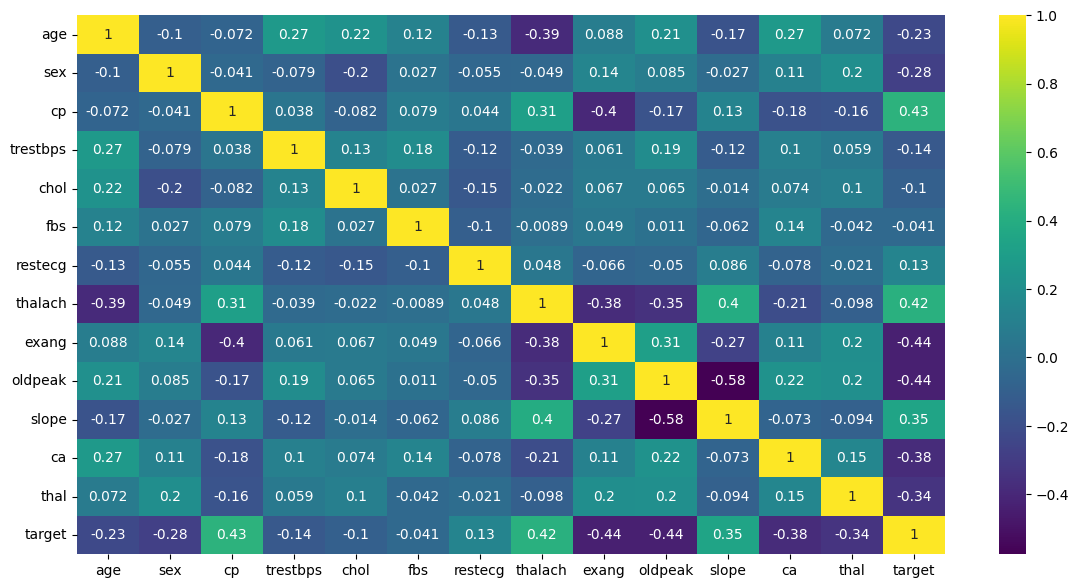

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (14,7))
sns.heatmap(cvd_df.corr(), annot = True, cmap= 'viridis');

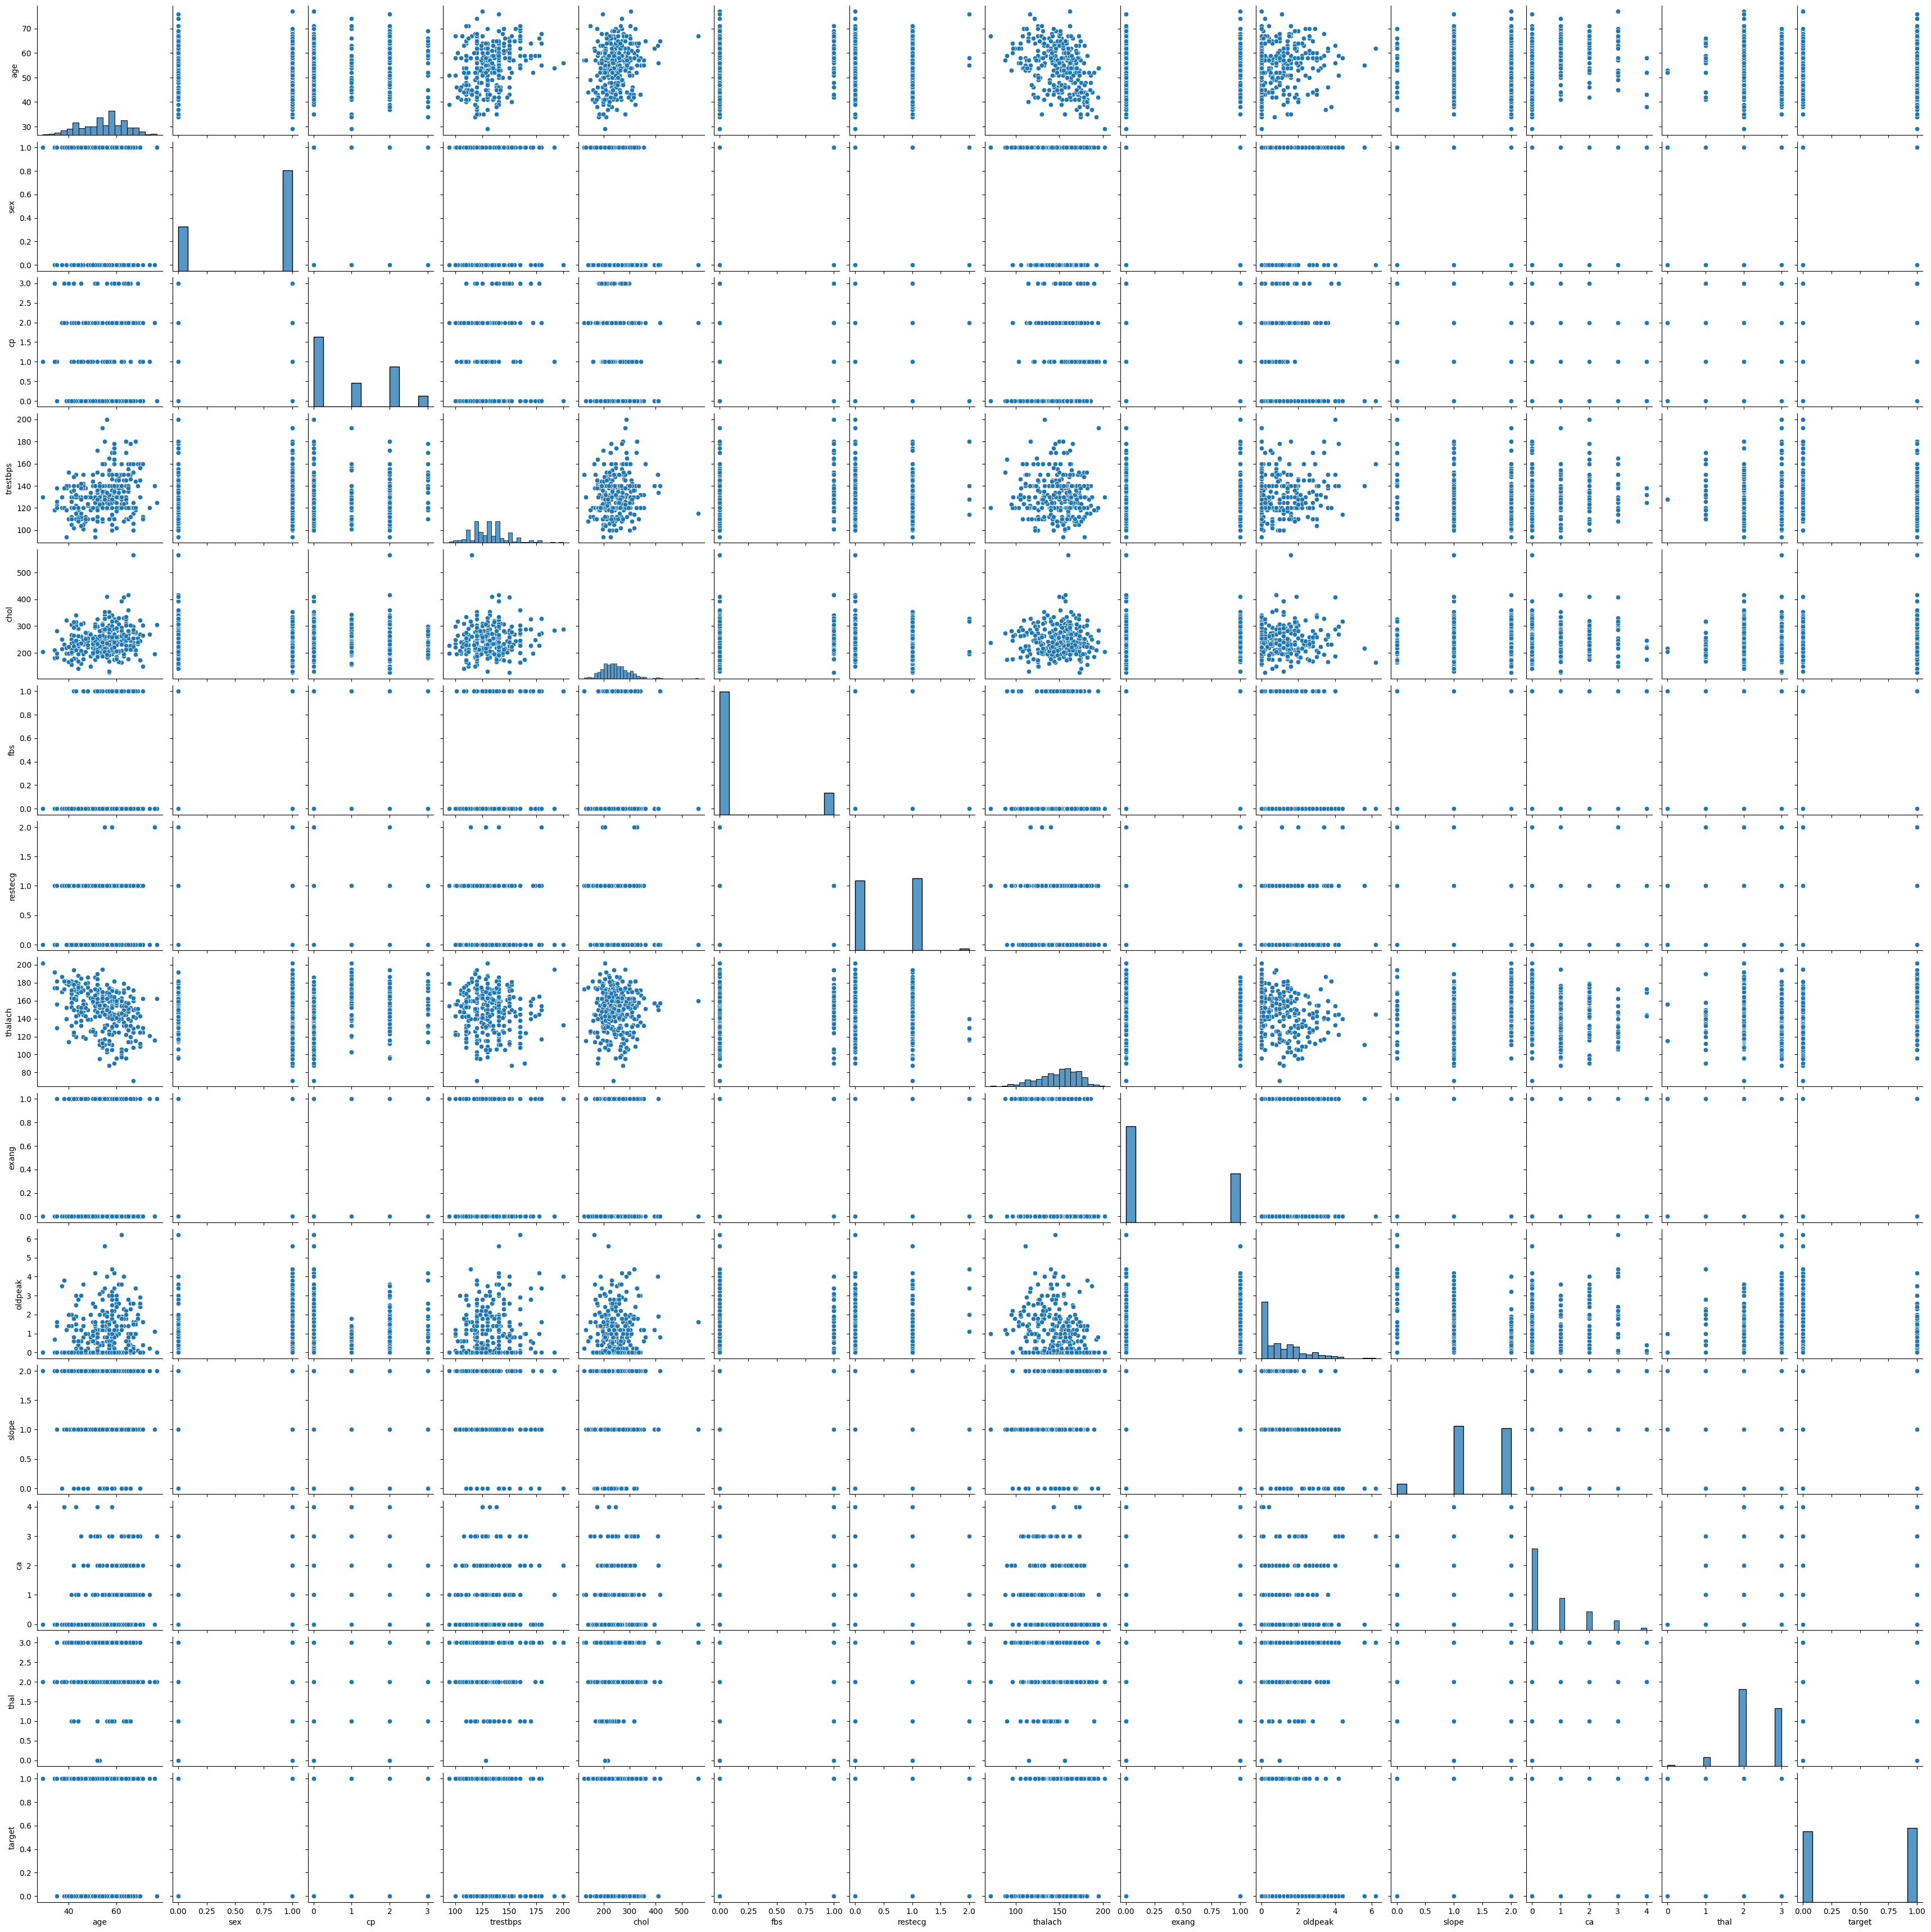

In [ ]:
sns.pairplot(cvd_df)

as we can see, there is high correlation between thal and chol. we see that there is also very high correlation between sex and blood pressure. this might explain why men are at higher risk for heart attack

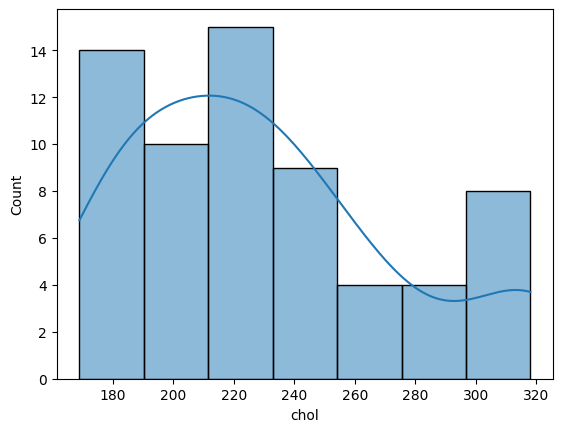

In [ ]:
sns.histplot(data=cvd_df,x=cvd_df[cvd_df["thal"]==1]["chol"],kde=True)
plt.show()

there is normal distribution with left shift. thus, we assume that the value of 0 has the meaning of undiagnose heart disease in thal


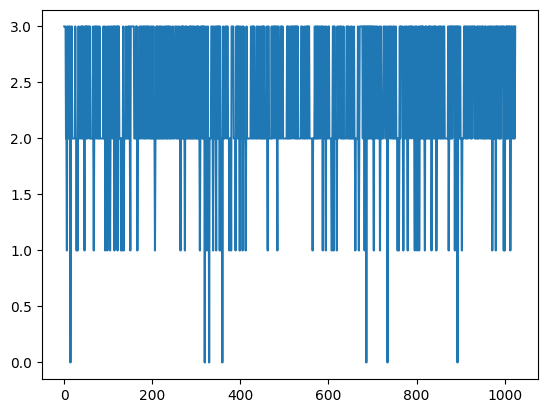

In [ ]:
laste = cvd_df['thal'].plot()
plt.show(laste)

**LOGISTICAL REGRESSION:**

Logistic regression is a statistical method used for binary classification tasks, where the outcome variable is categorical and has only two possible values, typically labeled as 0 and 1. It's called "regression" because it models the probability of the outcome belonging to a particular category. However, unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability of the outcome being in one of the two categories.



now, we create a function which can recieve input and give a chance of heart disease based on the model_1


In [ ]:
def sensitivity (tp,fn):
    return (tp/(tp+fn))*100
def specificity (tn,fp):
    return (tn/(tn+fp))*100

In [ ]:
from sklearn.linear_model import LogisticRegression
x = cvd_df.iloc[:,0:-1]
y = cvd_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assume X contains the features and y contains the target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7853658536585366


In [ ]:
#classification report can now be printed
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [ ]:
from sklearn.metrics import accuracy_score
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8658536585365854
Testing Accuracy: 0.7853658536585366


In [ ]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope):
    # Create a dataframe with user input
    features = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'chest pain type': [cp],
        'resting bp s': [trestbps],
        'cholesterol': [chol],
        'fasting blood sugar': [fbs],
        'resting ecg': [restecg],
        'max heart rate': [thalach],
        'exercise angina': [exang],
        'oldpeak': [oldpeak],
        'st slope': [slope]
    })

    # Check for columns that are expected by the model but not in the features dataframe
    not_existing_cols = [c for c in x.columns.tolist() if c not in features.columns.tolist()]

    # Add the missing columns to the features dataframe and fill with 0
    for col in not_existing_cols:
        features[col] = 0

    # Ensure the columns are in the same order as in the original dataframe
    features = features[x.columns.tolist()]
    #prediction
    prediction = model.predict(features)

    # Interpret prediction
    if prediction[0] == 1:
        return "Heart Disease"
    else:
        return "No Heart Disease"

# Make predictions based on user input
age = float(input("Enter age: "))
sex = input("Enter sex (male/female): ")
chest_pain_type = int(input("Enter chest pain type (1-4): "))
resting_bp_s = float(input("Enter resting blood pressure (mm Hg): "))
cholesterol = float(input("Enter cholesterol level (mg/dl): "))
fasting_blood_sugar = input("Fasting blood sugar > 120 mg/dl? (true/false): ")
resting_ecg = int(input("Enter resting ECG result (0-2): "))
max_heart_rate = float(input("Enter maximum heart rate achieved: "))
exercise_angina = input("Exercise-induced angina? (true/false): ")
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
st_slope = int(input("Enter slope of the peak exercise ST segment (1-3): "))

prediction = predict_heart_disease(age, sex, chest_pain_type, resting_bp_s, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, st_slope)
print("Prediction:",prediction)

Enter age: 50
Enter sex (male/female): 1
Enter chest pain type (1-4): 2
Enter resting blood pressure (mm Hg): 144
Enter cholesterol level (mg/dl): 243
Fasting blood sugar > 120 mg/dl? (true/false): 1
Enter resting ECG result (0-2): 1
Enter maximum heart rate achieved: 234
Exercise-induced angina? (true/false): 1
Enter ST depression induced by exercise relative to rest: 0.8
Enter slope of the peak exercise ST segment (1-3): 2
Prediction: No Heart Disease
